In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics
import pickle
import xgboost
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('traffic volume.csv')

In [4]:
data

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,Clouds,30-09-2018,19:00:00,3543
48200,NaN,282.76,0.0,0.0,Clouds,30-09-2018,20:00:00,2781
48201,NaN,282.73,0.0,0.0,Thunderstorm,30-09-2018,21:00:00,2159
48202,NaN,282.09,0.0,0.0,Clouds,30-09-2018,22:00:00,1450


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB
None


In [6]:
print(data.columns)

Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume'],
      dtype='object')


In [7]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [8]:
data.shape

(48204, 8)

In [9]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [10]:
data.dtypes

holiday            object
temp              float64
rain              float64
snow              float64
weather            object
date               object
Time               object
traffic_volume      int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [12]:
data['weather'].value_counts()


weather
Clouds          15144
Clear           13383
Mist             5942
Rain             5665
Snow             2875
Drizzle          1818
Haze             1359
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

In [13]:
data['temp'] = data['temp'].fillna(data['temp'].mean())
data['rain'] = data['rain'].fillna(data['rain'].mean())
data['snow'] = data['snow'].fillna(data['snow'].mean())


In [14]:
print(data['weather'].value_counts())

weather
Clouds          15144
Clear           13383
Mist             5942
Rain             5665
Snow             2875
Drizzle          1818
Haze             1359
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


In [15]:
data['weather'].fillna('Clouds',inplace=True)

C:\Users\saisa\AppData\Local\Temp\ipykernel_81348\1731991201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


In [16]:
data['weather'] = data['weather'].replace('Clouds', 1.0)
print(data['weather'].value_counts())


weather
1.0             15193
Clear           13383
Mist             5942
Rain             5665
Snow             2875
Drizzle          1818
Haze             1359
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


In [17]:
print(data['weather'].value_counts())
data['weather'] = data['weather'].fillna(1)
data['weather'].fillna('Clouds',inplace=True)

weather
1.0             15193
Clear           13383
Mist             5942
Rain             5665
Snow             2875
Drizzle          1818
Haze             1359
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


C:\Users\saisa\AppData\Local\Temp\ipykernel_81348\3517850937.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


In [18]:
# prompt: print NaN in holiday column to 0

data['holiday'].fillna(0, inplace=True)


C:\Users\saisa\AppData\Local\Temp\ipykernel_81348\821408972.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['holiday'].fillna(0, inplace=True)


In [19]:
print(data.head())

  holiday    temp  rain  snow weather        date      Time  traffic_volume
0       0  288.28   0.0   0.0     1.0  02-10-2012  09:00:00            5545
1       0  289.36   0.0   0.0     1.0  02-10-2012  10:00:00            4516
2       0  289.58   0.0   0.0     1.0  02-10-2012  11:00:00            4767
3       0  290.13   0.0   0.0     1.0  02-10-2012  12:00:00            5026
4       0  291.14   0.0   0.0     1.0  02-10-2012  13:00:00            4918


In [20]:
print(data.columns)


Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume'],
      dtype='object')


<Axes: ylabel='temp'>

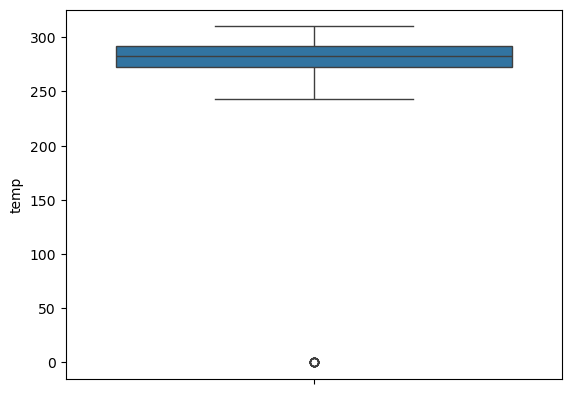

In [21]:
import seaborn as sns
sns.boxplot(data=data['temp'])

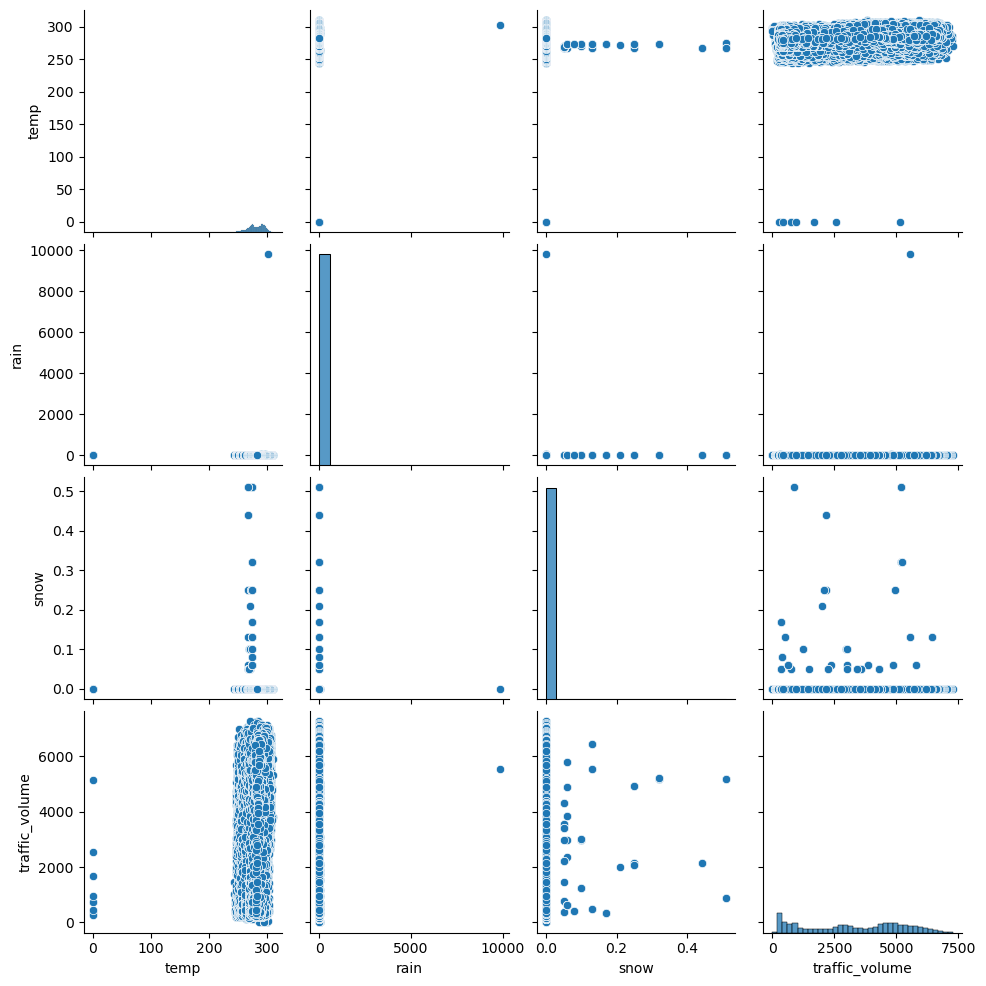

In [22]:
sns.pairplot(data)

<Axes: xlabel='count', ylabel='weather'>

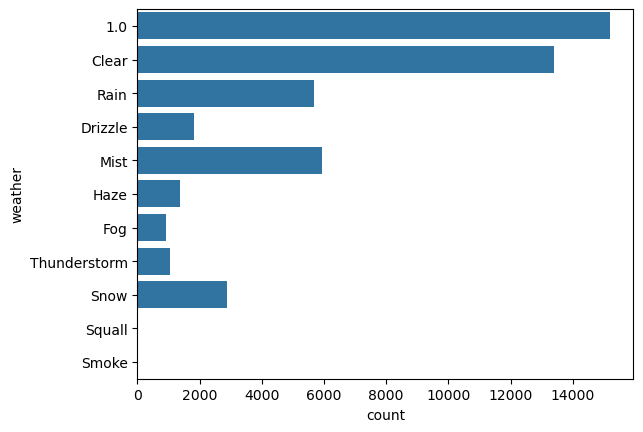

In [23]:
sns.countplot(data['weather'])

<Axes: ylabel='traffic_volume'>

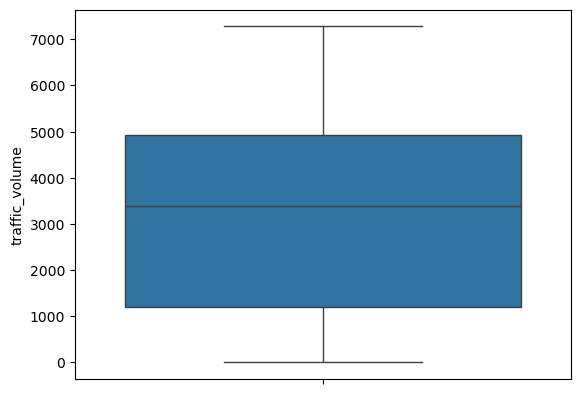

In [24]:
sns.boxplot(data['traffic_volume'])

<Axes: >

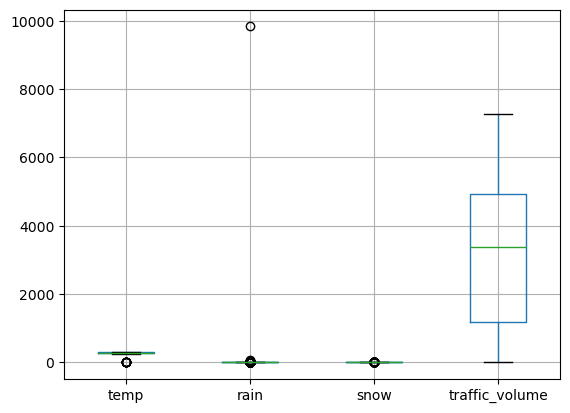

In [25]:
data.boxplot()

In [26]:
plt.show()

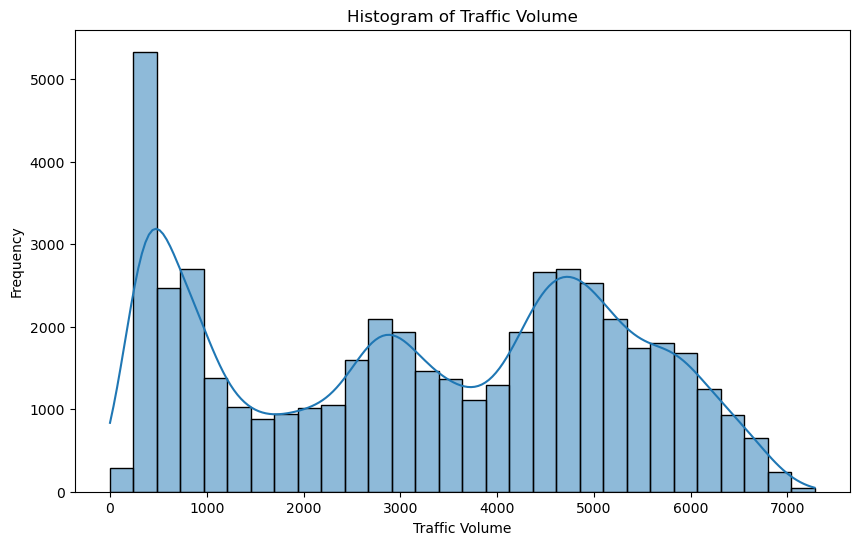

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['traffic_volume'], bins=30, kde=True)
plt.title('Histogram of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [28]:
numeric_df = data.select_dtypes(include=[np.number])
corr = numeric_df.corr()
corr

,temp,rain,snow,traffic_volume
temp,1.000000,0.009070,-0.019758,0.130034
rain,0.009070,1.000000,-0.000090,0.004714
snow,-0.019758,-0.000090,1.000000,0.000735
traffic_volume,0.130034,0.004714,0.000735,1.000000


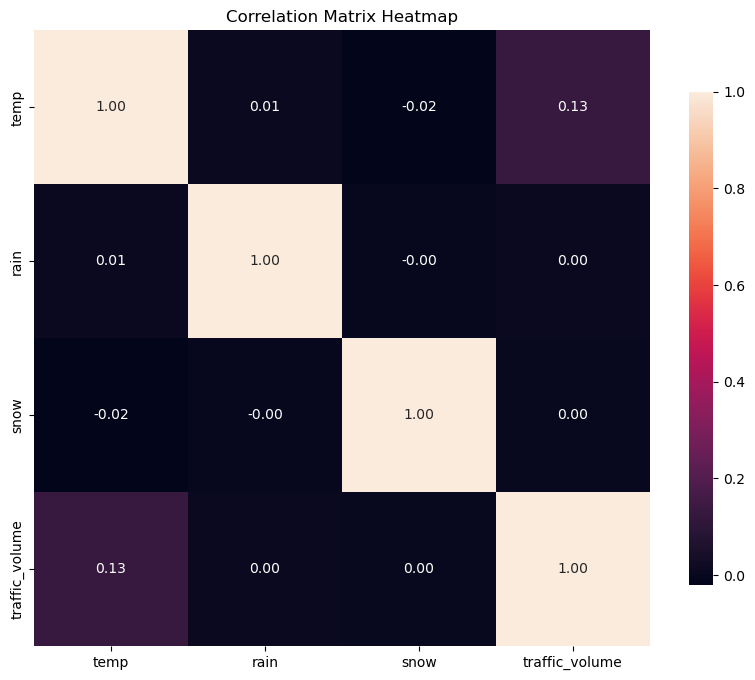

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
print(data.columns.tolist())

['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time', 'traffic_volume']


In [31]:
data[["day","month","year"]] = data["date"].str.split("-", expand=True)
data[["hours","minutes","seconds"]] = data["Time"].str.split(":", expand=True)
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [32]:
print(data.head())

  holiday    temp  rain  snow weather  traffic_volume day month  year hours  \
0       0  288.28   0.0   0.0     1.0            5545  02    10  2012    09   
1       0  289.36   0.0   0.0     1.0            4516  02    10  2012    10   
2       0  289.58   0.0   0.0     1.0            4767  02    10  2012    11   
3       0  290.13   0.0   0.0     1.0            5026  02    10  2012    12   
4       0  291.14   0.0   0.0     1.0            4918  02    10  2012    13   

  minutes seconds  
0      00      00  
1      00      00  
2      00      00  
3      00      00  
4      00      00  


In [33]:
print(data.columns)

Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'traffic_volume', 'day',
       'month', 'year', 'hours', 'minutes', 'seconds'],
      dtype='object')


In [34]:
data['weather'] = data['weather'].astype(str)

In [35]:
le = LabelEncoder()

In [36]:
le.fit(data['weather'])

LabelEncoder()

In [37]:
#splitting into independant and dependant variables
y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)
x['holiday'] = le.fit_transform(x['holiday'].astype(str))
x['weather'] = le.fit_transform(x['weather'].astype(str))



In [38]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,0,288.28,0.0,0.0,1.0,5545,02,10,2012,09,00,00
1,0,289.36,0.0,0.0,1.0,4516,02,10,2012,10,00,00
2,0,289.58,0.0,0.0,1.0,4767,02,10,2012,11,00,00
3,0,290.13,0.0,0.0,1.0,5026,02,10,2012,12,00,00
4,0,291.14,0.0,0.0,1.0,4918,02,10,2012,13,00,00


#Feature Scaling

In [39]:
feature_names = x.columns
names=x.columns
x=scale(x)
x=pd.DataFrame(x,columns=names)
print(x.head())

    holiday      temp      rain      snow   weather       day    month  \
0 -0.031467  0.530485 -0.007463 -0.027235 -0.903263 -1.574903  1.02758   
1 -0.031467  0.611467 -0.007463 -0.027235 -0.903263 -1.574903  1.02758   
2 -0.031467  0.627964 -0.007463 -0.027235 -0.903263 -1.574903  1.02758   
3 -0.031467  0.669205 -0.007463 -0.027235 -0.903263 -1.574903  1.02758   
4 -0.031467  0.744939 -0.007463 -0.027235 -0.903263 -1.574903  1.02758   

       year     hours  minutes  seconds  
0 -1.855294 -0.345548      0.0      0.0  
1 -1.855294 -0.201459      0.0      0.0  
2 -1.855294 -0.057371      0.0      0.0  
3 -1.855294  0.086718      0.0      0.0  
4 -1.855294  0.230807      0.0      0.0  


In [40]:
from sklearn import preprocessing 

In [41]:
label_encoder = preprocessing.LabelEncoder()

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=feature_names)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [44]:
lin_reg = linear_model. LinearRegression()
Dtree = tree. DecisionTreeRegressor()
Rand = ensemble. RandomForestRegressor()
svr = svm. SVR( )
XGB = xgboost . XGBRegressor ()

In [105]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(38563, 11)
(9641, 11)
(38563,)
(9641,)


In [46]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [48]:
from sklearn import metrics
print(metrics.r2_score(p1,y_train))
print(metrics. r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics. r2_score(p4,y_train))
print(metrics. r2_score(p5, y_train))

-5.472756887337536
1.0
0.9754339892276697
-12.321381423043771
0.8437391873380344


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np


In [50]:

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    explained_variance = explained_variance_score(y_true, y_pred)
    print("Regression Report:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R² Score: {r2}")
    print(f"Explained Variance Score: {explained_variance}")

In [51]:
p1 = lin_reg.predict(x_test)
regression_report(y_test,p1)

Regression Report:
Mean Absolute Error: 1636.2953568643181
Mean Squared Error: 3396329.885466899
Root Mean Squared Error: 1842.9134232152358
R² Score: 0.1409337960495174
Explained Variance Score: 0.14098653113248172


In [52]:
p2 = Dtree.predict(x_test)
regression_report(y_test,p2)

Regression Report:
Mean Absolute Error: 556.0307022093144
Mean Squared Error: 1113235.5938180687
Root Mean Squared Error: 1055.0998027760543
R² Score: 0.7184186731165016
Explained Variance Score: 0.7185565332505852


In [53]:

p3 = Rand.predict(x_test)
regression_report(y_test,p3)

Regression Report:
Mean Absolute Error: 496.2641375375998
Mean Squared Error: 618376.5326333056
Root Mean Squared Error: 786.3692088537709
R² Score: 0.8435881088069491
Explained Variance Score: 0.8436990497000445


In [54]:
p4 = svr.predict(x_test)
regression_report(y_test,p4)

Regression Report:
Mean Absolute Error: 1514.4442592965004
Mean Squared Error: 2997936.665498194
Root Mean Squared Error: 1731.4550717527134
R² Score: 0.2417032038218947
Explained Variance Score: 0.24356587986185607


In [55]:
p5 = XGB.predict(x_test)
regression_report(y_test,p5)

Regression Report:
Mean Absolute Error: 526.9308021329965
Mean Squared Error: 624874.4504241138
Root Mean Squared Error: 790.4900065301988
R² Score: 0.8419445283072992
Explained Variance Score: 0.8419667939670656


In [56]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [57]:
rf = RandomForestRegressor()
param_random_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
}

In [58]:
randomized_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_random_rf, n_iter=50, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
randomized_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error', verbose=2)

In [59]:
best_rf = randomized_search_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = metrics.r2_score(y_pred_rf, y_test)

In [60]:
print("Best parameters for Random Forest:", randomized_search_rf.best_params_)
print("Random Forest Test set MSE:", mse_rf)
print("R2 score after tunning : " , r2_rf)

Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Random Forest Test set MSE: 614488.1924932009
R2 score after tunning :  0.810861152520059


In [61]:
svr = SVR()
param_random_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf'],
}

In [62]:
random_search_svr = RandomizedSearchCV(estimator=svr, param_distributions=param_random_svr,scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
random_search_svr.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'epsilon': [0.1, 0.2, 0.5],
                                        'kernel': ['linear', 'rbf']},
                   scoring='neg_mean_squared_error', verbose=2)

In [63]:
best_svr = random_search_svr.best_estimator_
y_pred_svr = best_svr.predict(x_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = metrics.r2_score(y_pred_svr, y_test)

In [64]:
print("Best parameters for SVR:", random_search_svr.best_params_)
print("SVR Test set MSE:", mse_svr)
print("R2 score after tunning : " , r2_svr)

Best parameters for SVR: {'kernel': 'rbf', 'epsilon': 0.2, 'C': 10}
SVR Test set MSE: 1581668.2378595844
R2 score after tunning :  -0.10181595719108594


In [65]:
xgb = XGBRegressor()
param_random_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [66]:
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions = param_random_xgb,n_iter=50,scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
random_search_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\saisa\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [67]:
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = metrics.r2_score(y_pred_xgb, y_test)

In [68]:
print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("XGBoost Test set MSE:", mse_xgb)
print("R2 score after tunning : " , r2_xgb)

Best parameters for XGBoost: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
XGBoost Test set MSE: 543098.6347721742
R2 score after tunning :  0.8377967989111503


In [69]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [70]:
y_pred_linear = linear_reg.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = metrics.r2_score(y_pred_linear, y_test)

print("Linear Regression Test set MSE:", mse_linear)
print("R2 score after tunning : " , r2_linear)

Linear Regression Test set MSE: 3396329.885466899
R2 score after tunning :  -5.431808901706257


In [71]:
dt = DecisionTreeRegressor()
param_random_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
}

In [72]:
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_random_dt,n_iter=50,scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
random_search_dt.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\saisa\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='neg_mean_squared_error', verbose=2)

In [73]:
best_dt = random_search_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = metrics.r2_score(y_pred_dt, y_test)

In [74]:
print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Decision Tree Test set MSE:", mse_dt)
print("R2 score after tunning : " , r2_dt)

Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Decision Tree Test set MSE: 833521.5180339839
R2 score after tunning :  0.7382400818916621


In [75]:
#linear regression
regression_report(y_test,y_pred_linear)

Regression Report:
Mean Absolute Error: 1636.2953568643181
Mean Squared Error: 3396329.885466899
Root Mean Squared Error: 1842.9134232152358
R² Score: 0.1409337960495174
Explained Variance Score: 0.14098653113248172


In [76]:
#desicion tree
regression_report(y_test,y_pred_dt)

Regression Report:
Mean Absolute Error: 603.6450787440988
Mean Squared Error: 833521.5180339839
Root Mean Squared Error: 912.9739963624287
R² Score: 0.7891694297799162
Explained Variance Score: 0.7891918879235876


In [77]:
#random forest regression
regression_report(y_test,y_pred_rf)

Regression Report:
Mean Absolute Error: 496.2179130795561
Mean Squared Error: 614488.1924932009
Root Mean Squared Error: 783.8929726009801
R² Score: 0.8445716238707012
Explained Variance Score: 0.8446772869746311


In [78]:
#svr
regression_report(y_test,y_pred_svr)

Regression Report:
Mean Absolute Error: 982.2157266332686
Mean Squared Error: 1581668.2378595844
Root Mean Squared Error: 1257.643923318355
R² Score: 0.5999335238837403
Explained Variance Score: 0.6044051585985952


In [79]:
#xgb
regression_report(y_test,y_pred_xgb)

Regression Report:
Mean Absolute Error: 480.4567843019907
Mean Squared Error: 543098.6347721742
Root Mean Squared Error: 736.952260850168
R² Score: 0.8626288675488062
Explained Variance Score: 0.8626670740848482


In [80]:
import pickle
pickle.dump(best_xgb, open("model.pkl", 'wb'))
pickle.dump(scaler, open("scale.pkl", 'wb'))

